In [2]:
import numpy as np
import os
from nilearn import image, plotting
from nilearn.image import new_img_like
import matplotlib as mpl
import matplotlib.pyplot as plt

In [7]:
#Traversing through a tree of directories to get every file that you want to analise

# set Root folder of all LayNii Outputs
output_path = '/Users/Richard/LayNii/2705_sequences/'

#set metric as a list, possible values are: tSNR, mean, autocorr, noise, skew, overall_correl, imageSNR, stdev, local_gradient, kurt    
metrics = ["tSNR"]

def get_files_in_tree(directory, metrics):
    for root, dirs, files in os.walk(directory):
        for file in files:
            for metric in metrics:
                if file.endswith(metric + ".nii"):
                    #yield file
                    yield os.path.join(root, file)

#example output
list(get_files_in_tree(output_path, metrics))

['/Users/Richard/LayNii/2705_sequences/4D_3_2705/4D_3_2705_tSNR.nii',
 '/Users/Richard/LayNii/2705_sequences/4d_2_2705/4D_2_2705_tSNR.nii',
 '/Users/Richard/LayNii/2705_sequences/4D_1_2705/4D_1_2705_tSNR.nii']

In [3]:
os.listdir('/Users/Richard/LayNii/Pilot_Smoothed/0026')

['4D_0026_stdev.nii',
 '4D_0026.nii',
 '4D_0026_kurt.nii',
 '4D_0026_autocorr.nii',
 '4D_0026_tSNR.nii',
 '4D_0026_mean.nii',
 '4D_0026_skew.nii',
 '4D_0026_imageSNR.nii',
 '4D_0026_overall_correl.nii',
 '4D_0026_noise.nii',
 '4D_0026_local_gradient.nii']

In [13]:
#filter list for certain session numbers that you want to compare
def set_sessions(file_paths, substrings):
    filtered_paths = [path for path in file_paths if any(substring in path for substring in substrings)]
    return filtered_paths

all_files = get_files_in_tree(output_path, metrics)

sessions = ['4D_1_2705', '4D_2_2705', '4D_3_2705']

chart_files = set_sessions(all_files, sessions)

chart_files

['/Users/Richard/LayNii/2705_sequences/4D_3_2705/4D_3_2705_tSNR.nii',
 '/Users/Richard/LayNii/2705_sequences/4d_2_2705/4D_2_2705_tSNR.nii',
 '/Users/Richard/LayNii/2705_sequences/4D_1_2705/4D_1_2705_tSNR.nii']

In [14]:
def get_3d_nii_image(file_list):
    # List to store loaded NIfTI images
    loaded_images = []
    
    # Iterate over each file path in pilot_scans
    for file_path in file_list:
        # Load the NIfTI image
        nii_img = image.load_img(file_path)
        #Convert image to 3d
        nii_img_3d = image.new_img_like(nii_img, nii_img.get_fdata()[:, :, :, 0])
        
        # Append the loaded image to the list
        loaded_images.append(nii_img_3d)
    return loaded_images

get_3d_nii_image(chart_files)

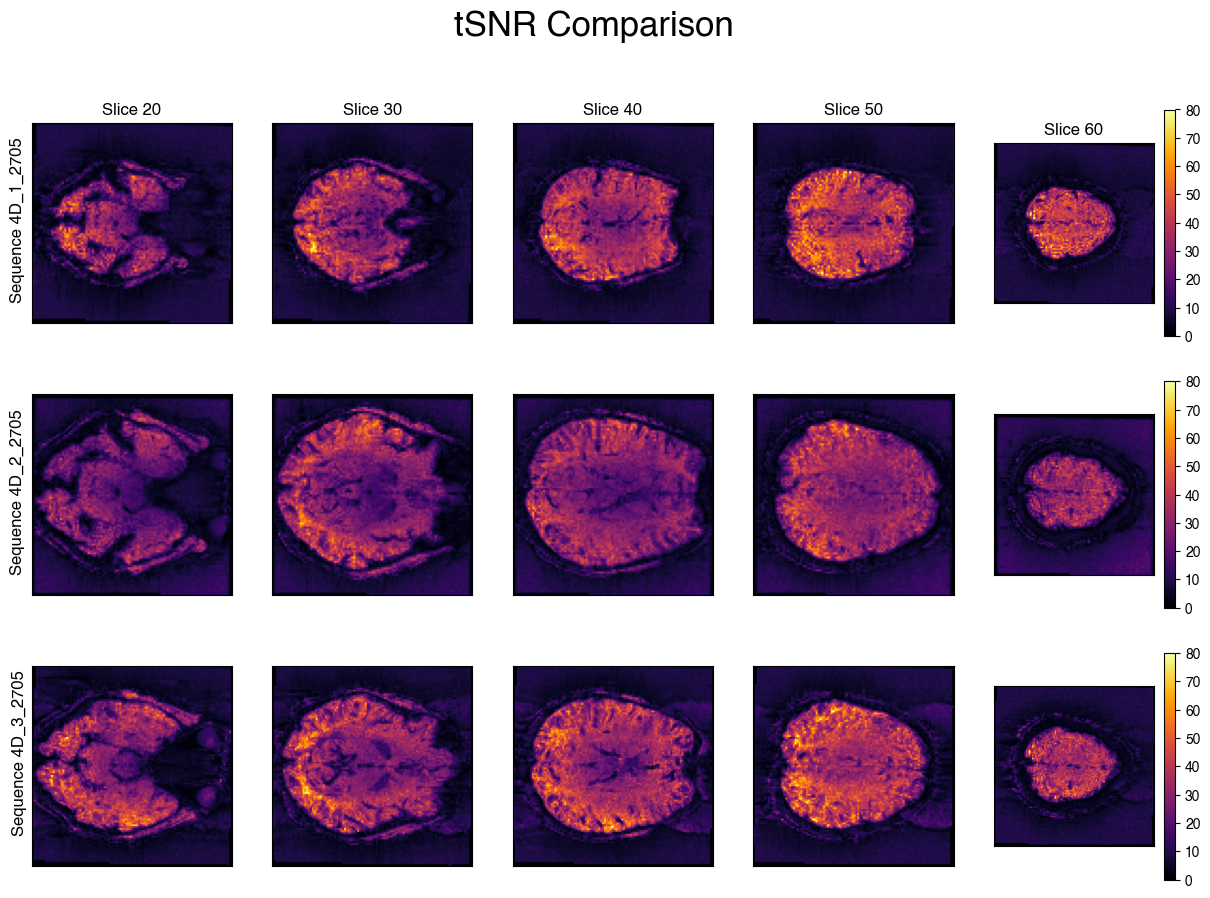

In [24]:
#load selected images
loaded_images = get_3d_nii_image(chart_files)

# set number of slices
slices = [20, 30, 40, 50, 60]

fig, axes = plt.subplots(nrows=3, ncols=len(slices), figsize=(15, 10))

# Set the default font family 
mpl.rcParams['font.family'] = 'helvetica'  # Change 'serif' to your desired font family

for i, nii_img in enumerate(loaded_images):

    # tSNR range based on this page here https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3819355/#:~:text=Many%20authors%20explicitly%20reported%20tSNR,varied%20from%200.5%20to%201.8.
    # Iterate over each tSNR slice
    for j, slice_val in enumerate(slices):
        data_slice = nii_img.get_fdata()[:, :, slice_val]
        
        # Plot tSNR values as an image on the corresponding subplot
        ax = axes[i, j]  # j = y-axis
        #range for mean (0, 1200)
        img = ax.imshow(data_slice,  cmap='inferno', vmin = 0, vmax = 80) #  Check out which range makes sense and then set the min and max


        if i == 0:
            ax.set_title(f"Slice {slice_val}", fontdict={'fontsize': 12})

        if j == 0:
            #fig.suptitle(f"TEST", fontsize=14)  # Title on top of the entire figure
            ax.text(-7, 45, f"Sequence {sessions[i]}", rotation=90, verticalalignment='center', horizontalalignment='center', fontdict={'fontsize': 12})  # Title on the left side of each plot             

        # Turn off x and y axis labels and ticks
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xticklabels([])
        ax.set_yticklabels([])

    fig.colorbar(img, ax=axes[i, -1], orientation='vertical')

    # Set the title of the subplot vertically on the y-axis
    plt.suptitle(f'{metrics[0] } Comparison', fontsize = 25)


#Generate saving title 
output_file_name = "_".join(sessions)

# Save the plot to a file
plt.savefig(metrics[0] + "_"+ output_file_name + '.png')


In [25]:
#Generate saving title 
output_file_name = "_".join(sessions)

output_file_name

'4D_1_2705_4D_2_2705_4D_3_2705'